In [1]:
import pandas as pd  # Importing Pandas for data handling
import numpy as np  # Importing NumPy for numerical operations
import networkx as nx  # Importing NetworkX for graph-based analysis
from sklearn.model_selection import train_test_split  # Function to split data for model training and testing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # StandardScaler for feature scaling
from sklearn.ensemble import RandomForestRegressor  # Using Random Forest for regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Error metrics to evaluate model performance
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for advanced visualization

In [2]:
# Step 1: Load Dataset
df = pd.read_csv('/content/transportation_logistics_large_dataset.csv')  # Loading CSV file into a Pandas DataFrame

In [3]:
# Step 2: Data Understanding
print("Dataset Shape:", df.shape)  # Checking the number of rows and columns in the dataset
print("Dataset Info:")
print(df.info())  # Overview of dataset structure and data types
print("\nMissing Values:\n", df.isnull().sum())  # Identifying missing values in the dataset

Dataset Shape: (100000, 9)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Shipment_ID                  100000 non-null  object 
 1   Pickup_Location              100000 non-null  object 
 2   Drop_Location                100000 non-null  object 
 3   Distance_KM                  100000 non-null  int64  
 4   Estimated_Delivery_Time_Hrs  100000 non-null  float64
 5   Actual_Delivery_Time_Hrs     100000 non-null  float64
 6   Vehicle_Type                 100000 non-null  object 
 7   Fuel_Consumption_Liters      100000 non-null  float64
 8   Traffic_Conditions           100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB
None

Missing Values:
 Shipment_ID                    0
Pickup_Location                0
Drop_Location                  0
Distance_KM      

In [4]:
# Step 3: Handling Missing Values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)  # Filling missing numerical values with median

In [5]:
# Step 4: Encoding Categorical Variables
label_encoders = {}
categorical_cols = ["Pickup_Location", "Drop_Location", "Vehicle_Type", "Traffic_Conditions"]
for col in categorical_cols:
    le = LabelEncoder()  # LabelEncoder to convert categorical variables to numeric
    df[col] = le.fit_transform(df[col])  # Converting categories to numbers
    label_encoders[col] = le  # Saving encoders for future use

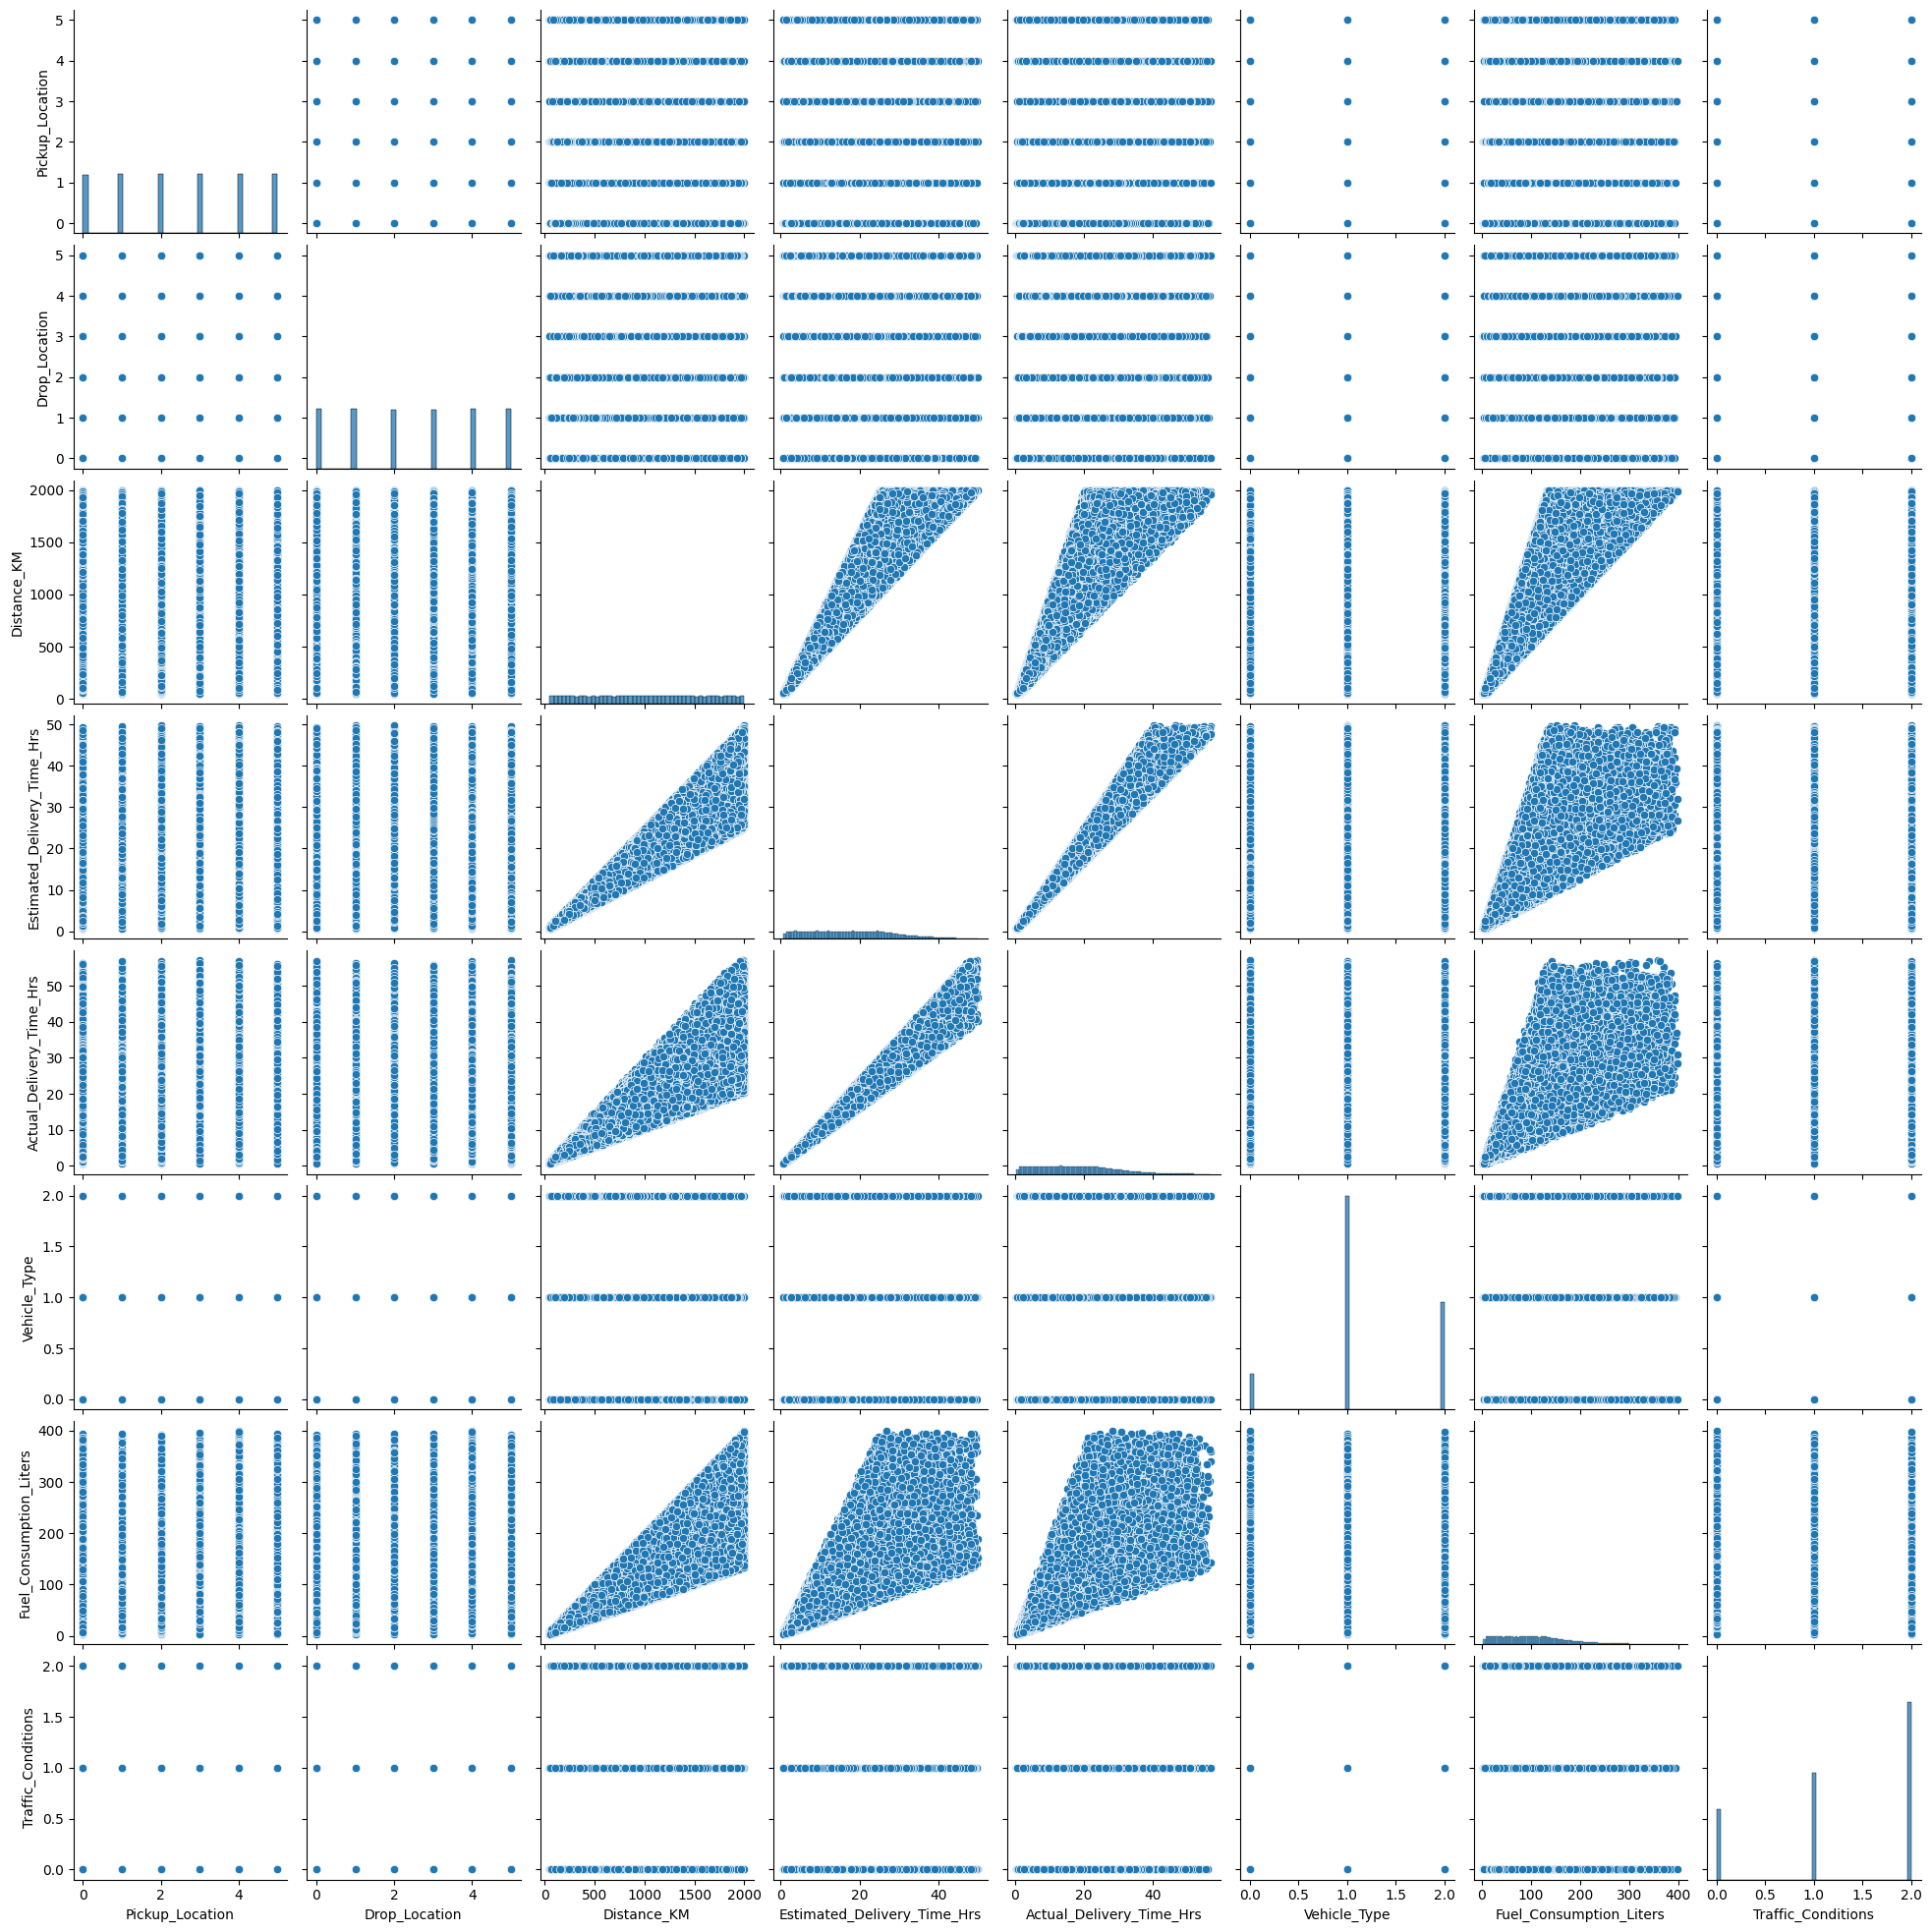

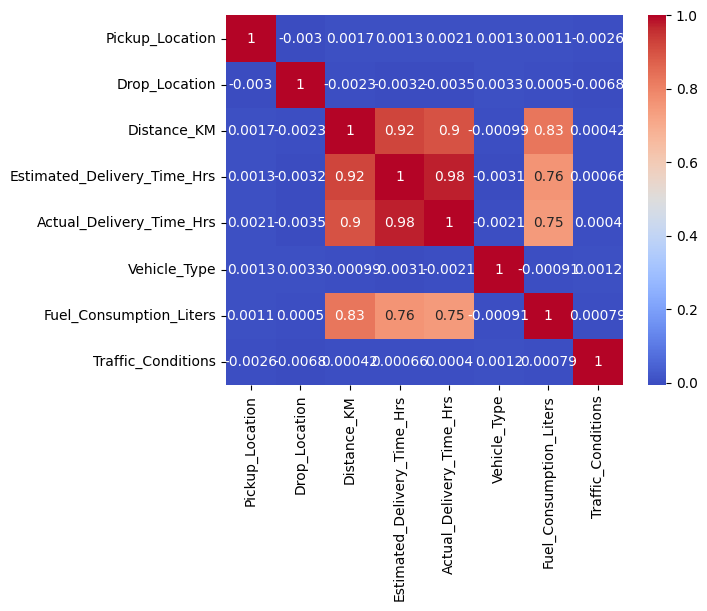

In [6]:
# Pairplot (Sirf Numerical Columns ke liye)
numeric_cols = df.select_dtypes(include=['number'])  # Selecting only numerical columns
sns.pairplot(numeric_cols)
plt.show()

# Correlation Matrix (Sirf Numerical Columns)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [7]:

# Step 6: Splitting Dataset into Features and Target Variables
X = df.drop(columns=["Actual_Delivery_Time_Hrs", "Shipment_ID"])  # Features
y = df["Actual_Delivery_Time_Hrs"]  # Target variable

In [8]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Function to split data for model training and testing


In [9]:
# Step 8: Standardizing Numerical Features
scaler = StandardScaler()  # StandardScaler for feature scaling
numeric_features = ["Distance_KM", "Estimated_Delivery_Time_Hrs", "Fuel_Consumption_Liters"]
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [11]:
# Step 9: Train Machine Learning Model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using Random Forest for regression model
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [12]:
# Step 10: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)  # Error metrics to evaluate model performance
mse = mean_squared_error(y_test, y_pred)  # Error metrics to evaluate model performance
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1.81932029
Mean Squared Error: 6.062429161811002


In [16]:
# Step 11: Route Optimization using Dijkstra Algorithm
graph = nx.Graph()

# Add edges to the graph properly
for i in range(len(df)):
    pickup = df.iloc[i]["Pickup_Location"]  # Ensure string values
    drop = df.iloc[i]["Drop_Location"]
    distance = df.iloc[i]["Distance_KM"]

    graph.add_edge(pickup, drop, weight=distance)

# Function to find the shortest route
def find_shortest_route(start, end):
    if start not in graph or end not in graph:
        print(f"Error: {start} or {end} not found in graph nodes!")
        return []
    return nx.shortest_path(graph, source=start, target=end, weight='weight')

# Check existing nodes
print("Graph Nodes:", graph.nodes)

# Example Route
start_location = "Delhi"
end_location = "Pune"
shortest_route = find_shortest_route(start_location, end_location)

if shortest_route:
    print(f"Shortest Route from {start_location} to {end_location}: {shortest_route}")


Graph Nodes: [3, 1, 0, 2, 4, 5]
Error: Delhi or Pune not found in graph nodes!
